In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sheets = pd.read_excel(r"C:\Users\lucas\OneDrive\Documentos\Project End to End Sales\data\Data Cleaning(EDA).xlsx", sheet_name=None)


#### EDA

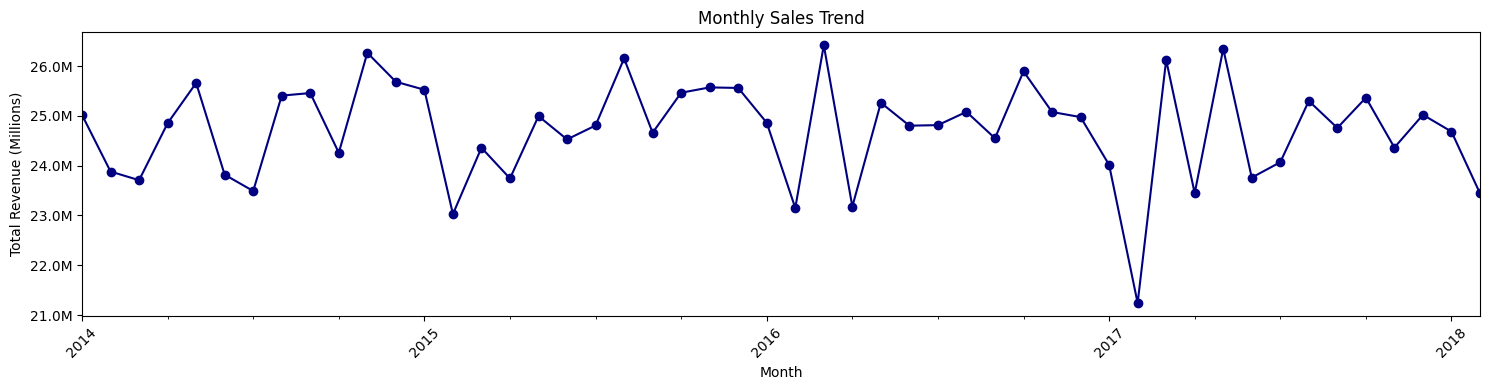

In [126]:
df["order_month"] = df["order_date"].dt.to_period("M")

monthly_sales = df.groupby("order_month")["revenue"].sum()

plt.figure(figsize=(15,4))

monthly_sales.plot(marker="o", color="navy")

from matplotlib.ticker import FuncFormatter

formatter = FuncFormatter(lambda x, pos: f"{x/1e6}M")
plt.gca().yaxis.set_major_formatter(formatter)

plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue (Millions)")

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [127]:

df['order_month_num'] = df['order_date'].dt.month
df['order_month_name'] = df['order_date'].dt.month_name() 

In [128]:
df.columns

Index(['order_number', 'order_date', 'customer_name', 'channel',
       'product_name', 'order_quantity', 'unit_price', 'revenue',
       'total unit cost', 'state', 'county', 'state_name', 'region', 'lat',
       'lon', 'budget', 'total_cost', 'profit', 'profit_margin_pct',
       'order_month', 'order_month_num', 'order_month_name', 'cost',
       'quantity'],
      dtype='object')

In [129]:
df_ = df[df['order_date'].dt.year != 2018]


In [130]:
df_.columns

Index(['order_number', 'order_date', 'customer_name', 'channel',
       'product_name', 'order_quantity', 'unit_price', 'revenue',
       'total unit cost', 'state', 'county', 'state_name', 'region', 'lat',
       'lon', 'budget', 'total_cost', 'profit', 'profit_margin_pct',
       'order_month', 'order_month_num', 'order_month_name', 'cost',
       'quantity'],
      dtype='object')

In [131]:
df_["order_month_num"].head()

0    1
1    1
2    1
3    1
4    1
Name: order_month_num, dtype: int32

In [132]:
monthly_sales = (
    df_
    .groupby(['order_month_num', 'order_month_name'])['revenue']
    .sum()
    .sort_index()
)

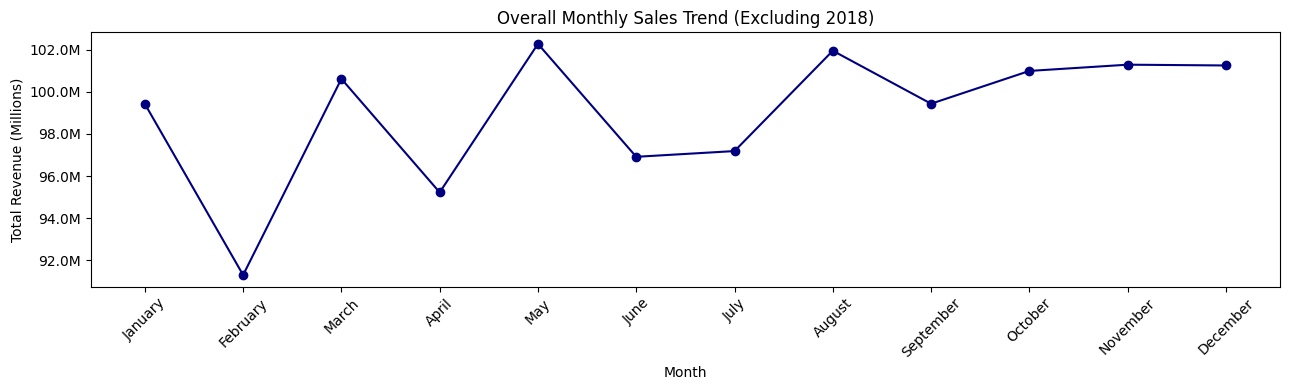

In [133]:
plt.figure(figsize=(13, 4))
plt.plot(
    monthly_sales.index.get_level_values(1),  
    monthly_sales.values,                     
    marker='o',                                
    color='navy'                               
)

formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Overall Monthly Sales Trend (Excluding 2018)')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

C:\Users\lucas\AppData\Local\Temp\ipykernel_18552\1926358948.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




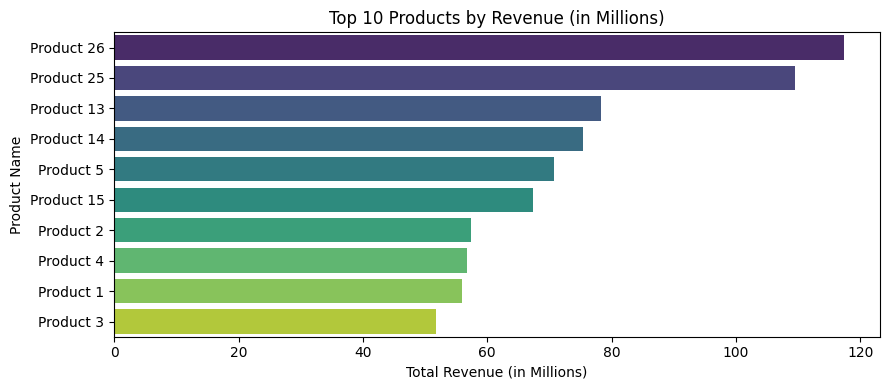

In [134]:

top_prod = df.groupby('product_name')['revenue'].sum() / 1_000_000

top_prod = top_prod.nlargest(10)

plt.figure(figsize=(9, 4))

sns.barplot(
    x=top_prod.values,    
    y=top_prod.index,     
    palette='viridis'     
)

plt.title('Top 10 Products by Revenue (in Millions)')  
plt.xlabel('Total Revenue (in Millions)')              
plt.ylabel('Product Name')                             

plt.tight_layout()

plt.show()

C:\Users\lucas\AppData\Local\Temp\ipykernel_18552\3844621316.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




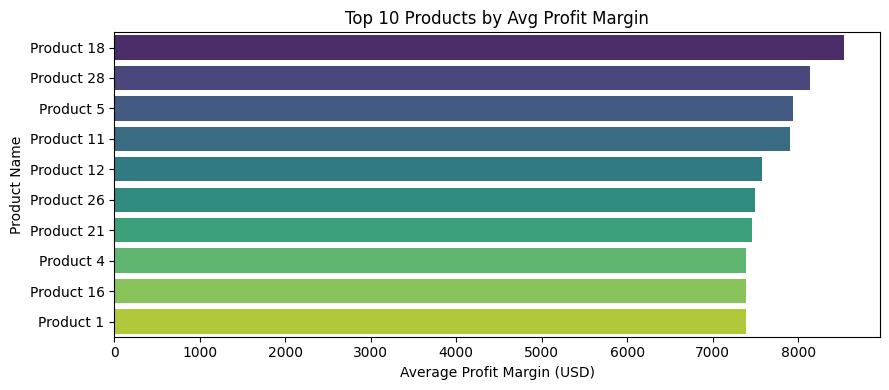

In [135]:
top_margin = (
    df.groupby('product_name')['profit']
      .mean()                        
      .sort_values(ascending=False)  
      .head(10)                      
)

plt.figure(figsize=(9, 4))

sns.barplot(
    x=top_margin.values,    
    y=top_margin.index,     
    palette='viridis'       
)

plt.title('Top 10 Products by Avg Profit Margin')  
plt.xlabel('Average Profit Margin (USD)')          
plt.ylabel('Product Name')                         

plt.tight_layout()
plt.show()

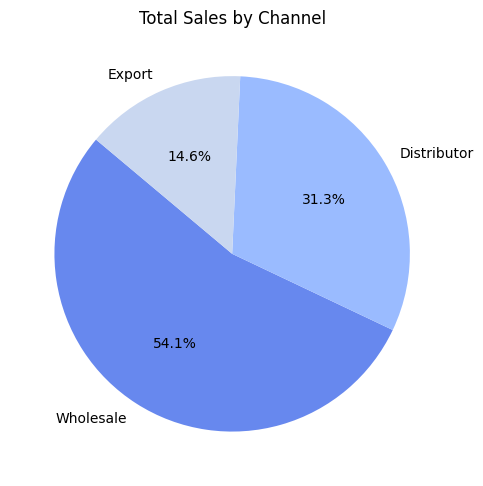

In [136]:
chan_sales = df.groupby('channel')['revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(5, 5))

plt.pie(
    chan_sales.values,                   
    labels=chan_sales.index,             
    autopct='%1.1f%%',                   
    startangle=140,                      
    colors=sns.color_palette('coolwarm') 
)

plt.title('Total Sales by Channel')

plt.tight_layout()

plt.show()

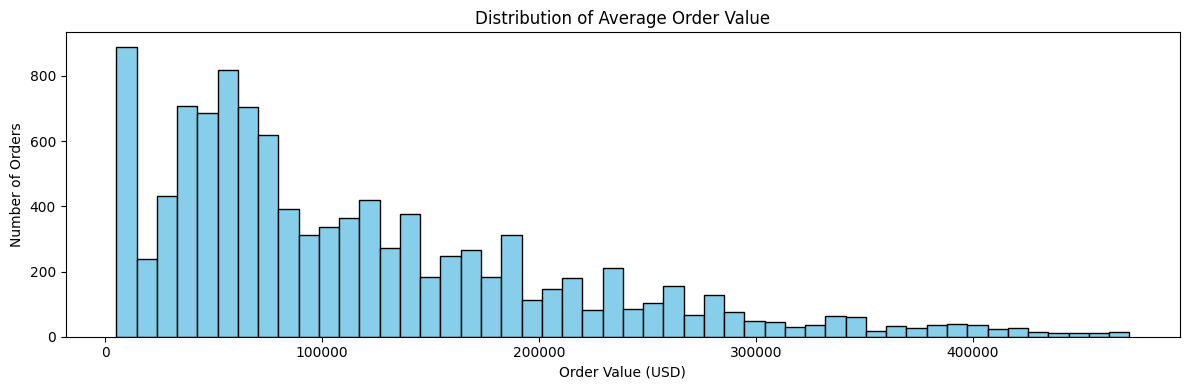

In [137]:
aov = df.groupby('order_number')['revenue'].sum()
plt.figure(figsize=(12, 4))

plt.hist(
    aov,               
    bins=50,           
    color='skyblue',   
    edgecolor='black'  
)

plt.title('Distribution of Average Order Value')
plt.xlabel('Order Value (USD)')
plt.ylabel('Number of Orders')

plt.tight_layout()

plt.show()

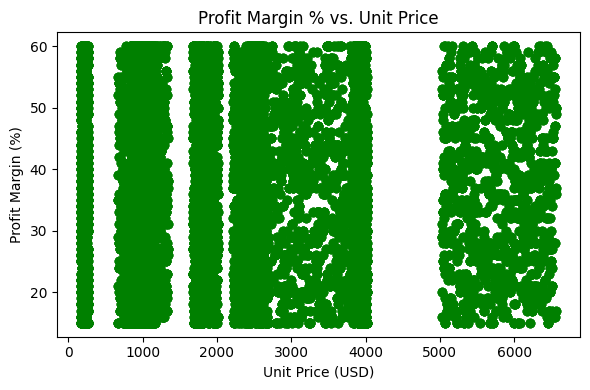

In [138]:
df['profit_margin_pct'] = (df['profit'] / df['revenue']) * 100

plt.figure(figsize=(6,4))

plt.scatter(
    df['unit_price'],            
    df['profit_margin_pct'],     
    alpha=0.6,                   
    color='green'                
)

plt.title('Profit Margin % vs. Unit Price')  
plt.xlabel('Unit Price (USD)')                
plt.ylabel('Profit Margin (%)')               

plt.tight_layout()

plt.show()

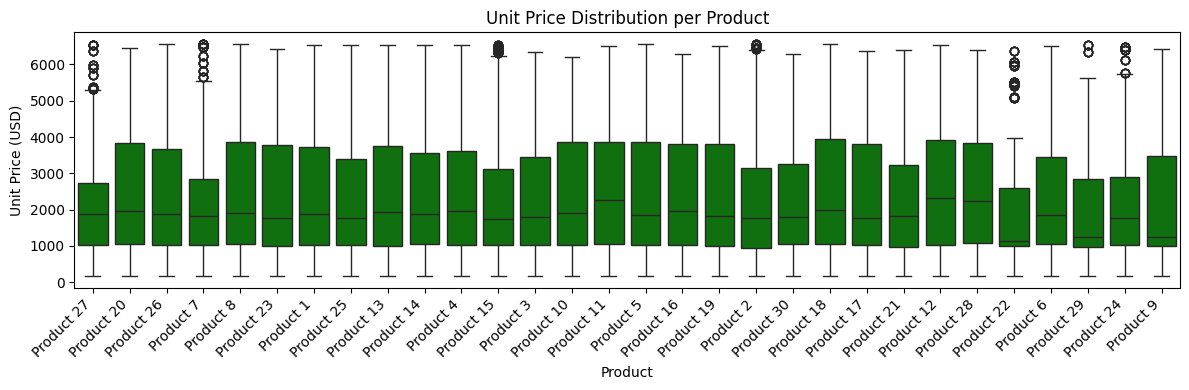

In [139]:
plt.figure(figsize=(12,4))

sns.boxplot(
    data=df,
    x='product_name',   
    y='unit_price',      
    color='g'            
)

plt.title('Unit Price Distribution per Product')  
plt.xlabel('Product')                              
plt.ylabel('Unit Price (USD)')                     

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()

C:\Users\lucas\AppData\Local\Temp\ipykernel_18552\3158039547.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




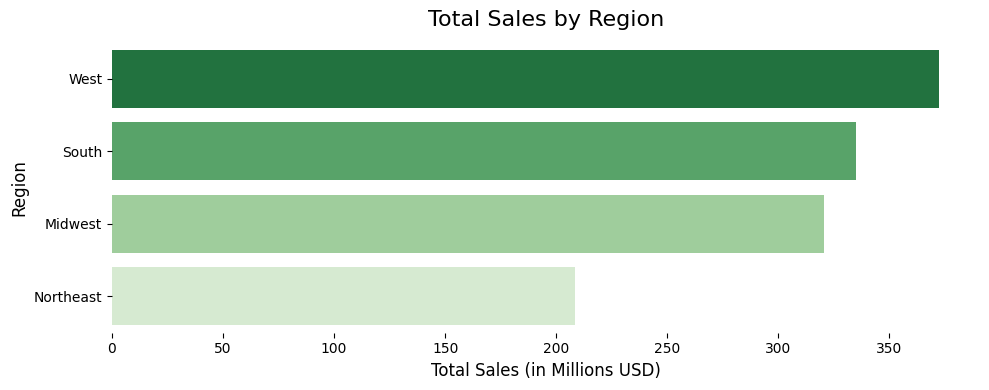

In [140]:
region_sales = (
    df
    .groupby('region')['revenue']
    .sum()
    .sort_values(ascending=False)  
    / 1e6                         
)

plt.figure(figsize=(10, 4))
sns.barplot(
    x=region_sales.values,
    y=region_sales.index,
    palette='Greens_r'          
)

plt.title('Total Sales by Region', fontsize=16, pad=12)
plt.xlabel('Total Sales (in Millions USD)', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.xticks(rotation=0)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

In [141]:
import plotly.express as px

state_sales = (
    df
    .groupby('state')['revenue']
    .sum()
    .reset_index()
)
state_sales['revenue_m'] = state_sales['revenue'] / 1e6  

fig = px.choropleth(
    state_sales,
    locations='state',            
    locationmode='USA-states',    
    color='revenue_m',
    scope='usa',
    labels={'revenue_m':'Total Sales (M USD)'},
    color_continuous_scale='Blues',
    hover_data={'revenue_m':':.2f'}  
)

fig.update_layout(
    title_text='Total Sales by State',
    margin=dict(l=0, r=0, t=40, b=0),
    coloraxis_colorbar=dict(
        title='Sales (M USD)',
        ticksuffix='M'
    )
)

fig.show()

C:\Users\lucas\AppData\Local\Temp\ipykernel_18552\2578680418.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\lucas\AppData\Local\Temp\ipykernel_18552\2578680418.py:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




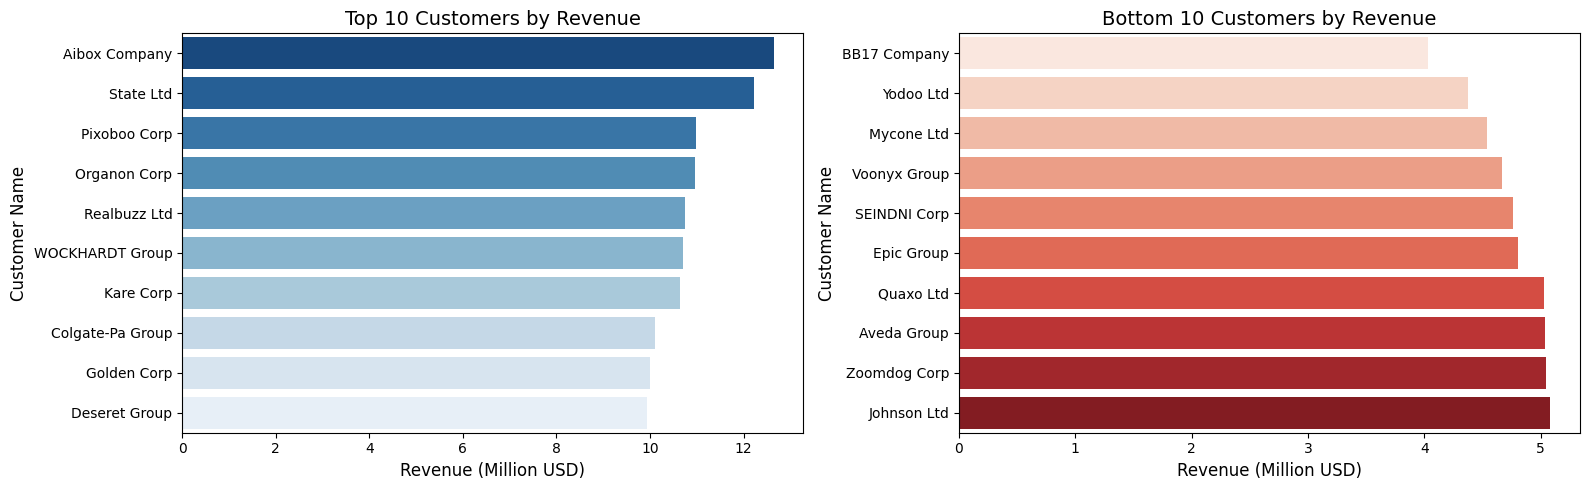

In [142]:
top_rev = (
    df.groupby('customer_name')['revenue']
      .sum()                        
      .sort_values(ascending=False) 
      .head(10)                     
)

bottom_rev = (
    df.groupby('customer_name')['revenue']
      .sum()                        
      .sort_values(ascending=True)  
      .head(10)                     
)
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

sns.barplot(
    x=top_rev.values / 1e6,    
    y=top_rev.index,           
    palette='Blues_r',         
    ax=axes[0]                 
)
axes[0].set_title('Top 10 Customers by Revenue', fontsize=14)         
axes[0].set_xlabel('Revenue (Million USD)', fontsize=12)              
axes[0].set_ylabel('Customer Name', fontsize=12)                      

sns.barplot(
    x=bottom_rev.values / 1e6, 
    y=bottom_rev.index,        
    palette='Reds',            
    ax=axes[1]                 
)
axes[1].set_title('Bottom 10 Customers by Revenue', fontsize=14)      
axes[1].set_xlabel('Revenue (Million USD)', fontsize=12)              
axes[1].set_ylabel('Customer Name', fontsize=12)                      

plt.tight_layout()
plt.show()

C:\Users\lucas\AppData\Local\Temp\ipykernel_18552\164025102.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




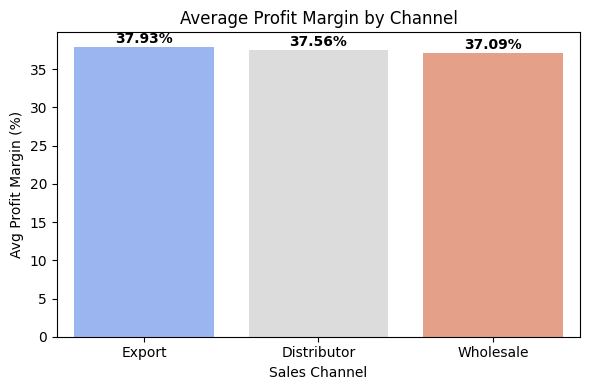

In [143]:
channel_margin = (
    df.groupby('channel')['profit_margin_pct']  
      .mean()                                  
      .sort_values(ascending=False)            
)

plt.figure(figsize=(6, 4))

ax = sns.barplot(
    x=channel_margin.index,    
    y=channel_margin.values,   
    palette='coolwarm'         
)

plt.title('Average Profit Margin by Channel')  
plt.xlabel('Sales Channel')                    
plt.ylabel('Avg Profit Margin (%)')             

for i, v in enumerate(channel_margin.values):
    ax.text(
        i,                  
        v + 0.5,            
        f"{v:.2f}%",        
        ha='center',        
        fontweight='bold'   
    )

plt.tight_layout()
plt.show()

C:\Users\lucas\AppData\Local\Temp\ipykernel_18552\3901876496.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




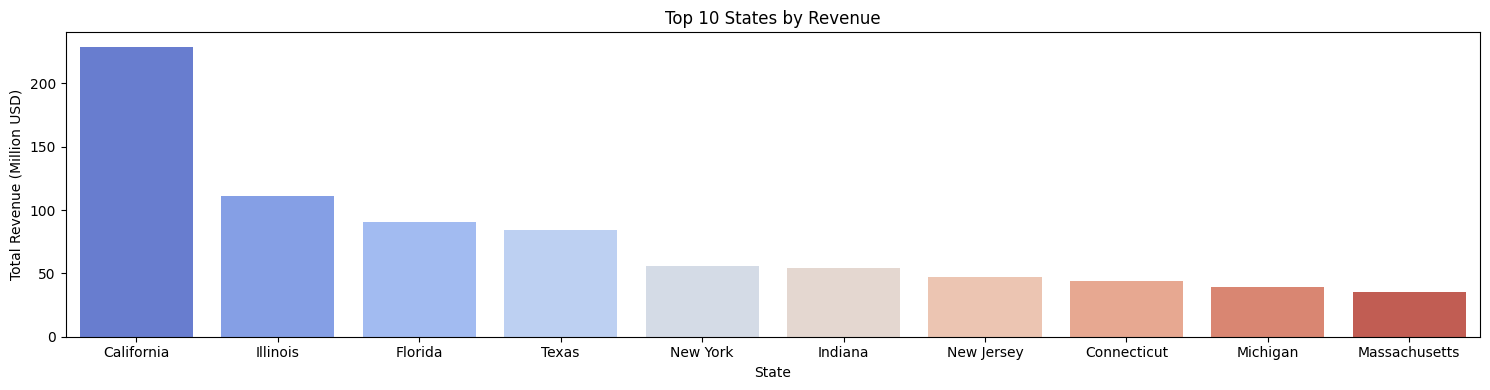

C:\Users\lucas\AppData\Local\Temp\ipykernel_18552\3901876496.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




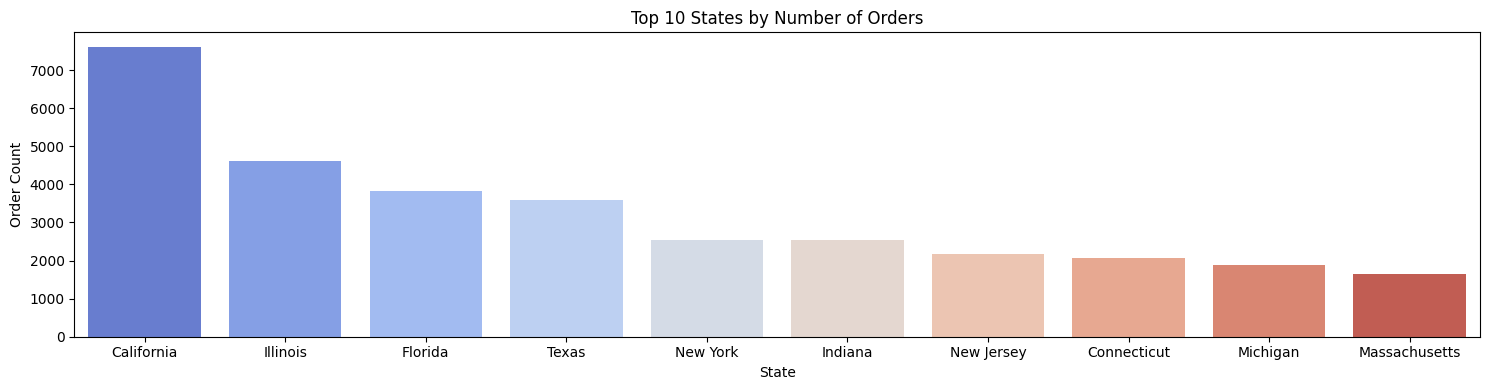

In [144]:
state_rev = df.groupby('state_name').agg(
    revenue=('revenue', 'sum'),          
    orders=('order_number', 'nunique')   
).sort_values('revenue', ascending=False).head(10)  

plt.figure(figsize=(15, 4))
sns.barplot(
    x=state_rev.index,                   
    y=state_rev['revenue'] / 1e6,        
    palette='coolwarm'                   
)
plt.title('Top 10 States by Revenue')     
plt.xlabel('State')                       
plt.ylabel('Total Revenue (Million USD)') 
plt.tight_layout()                        
plt.show()                                

plt.figure(figsize=(15, 4))
sns.barplot(
    x=state_rev.index,                   
    y=state_rev['orders'],               
    palette='coolwarm'                   
)
plt.title('Top 10 States by Number of Orders')  
plt.xlabel('State')                              
plt.ylabel('Order Count')                        
plt.tight_layout()                               
plt.show()                                       

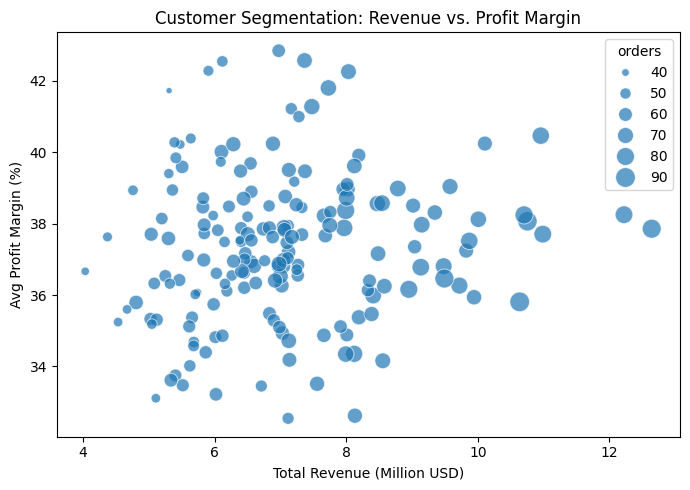

In [145]:
cust_summary = df.groupby('customer_name').agg(
    total_revenue=('revenue', 'sum'),
    total_profit=('profit', 'sum'),
    avg_margin=('profit_margin_pct', 'mean'),
    orders=('order_number', 'nunique')
)

cust_summary['total_revenue_m'] = cust_summary['total_revenue'] / 1e6

plt.figure(figsize=(7, 5))

sns.scatterplot(
    data=cust_summary,
    x='total_revenue_m',        
    y='avg_margin',
    size='orders',
    sizes=(20, 200),
    alpha=0.7
)

plt.title('Customer Segmentation: Revenue vs. Profit Margin')
plt.xlabel('Total Revenue (Million USD)')  
plt.ylabel('Avg Profit Margin (%)')

plt.tight_layout()
plt.show()

In [146]:
df["cost"] = df["total unit cost"]
df["quantity"] = df['order_quantity']

In [147]:
num_cols = ['quantity', 'unit_price', 'revenue', 'cost', 'profit']

In [148]:
df.columns

Index(['order_number', 'order_date', 'customer_name', 'channel',
       'product_name', 'order_quantity', 'unit_price', 'revenue',
       'total unit cost', 'state', 'county', 'state_name', 'region', 'lat',
       'lon', 'budget', 'total_cost', 'profit', 'profit_margin_pct',
       'order_month', 'order_month_num', 'order_month_name', 'cost',
       'quantity'],
      dtype='object')

In [149]:
corr = df[num_cols].corr()

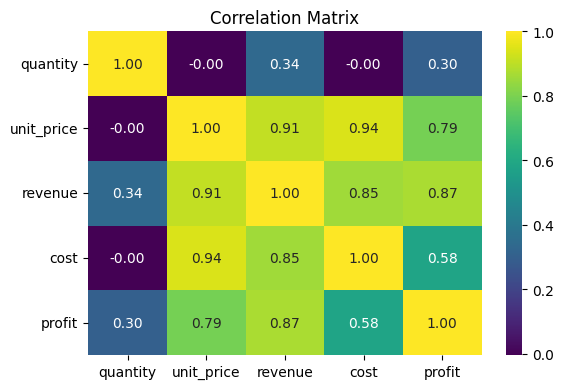

In [150]:
plt.figure(figsize=(6,4))

sns.heatmap(
    corr,           
    annot=True,     
    fmt=".2f",      
    cmap='viridis'  
)

plt.title('Correlation Matrix')

plt.tight_layout()

plt.show()